In [124]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle
import _pickle as pickle
import seaborn as sns
import numpy as np 
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [160]:
file = open("Final_Updated_Engg_Oct_new.pickle",'rb')
df_final = pickle.load(file)
file.close()

In [126]:
df_final.drop(columns='zip_code_prefix_seller',inplace=True,axis=1)
df_final.drop(columns='product_category_name',axis=1 ,inplace=True)
df_final.columns

Index(['customer_state', 'order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_city', 'seller_state',
       'product_category_name_english', 'price_new', 'freight_value_new',
       'product_length_cm_new', 'product_weight_g_new', 'payment_value_new',
       'payment_installments_new', 'Duration_delivered_Purchase_days',
       'Delivered_Within_Estimated', 'Month_Year_Purchase_Order',
       'Month_year_order_deliverd'],
      dtype='object')

## Finding Outlier

In [67]:
# q25, q75 = np.percentile(new_df_numeric.price, 25), np.percentile(new_df_numeric.price, 75)
# iqr = q75 - q25
# cut_off = iqr * 1.5
# lower, upper = q25 - cut_off, q75 + cut_off
# #outliers = [x for x in new_df_numeric.price if x < lower or x > upper]
# Outlier_index=new_df_numeric[(new_df_numeric.price<lower) | (new_df_numeric.price>upper)].index.to_list()
# new_df_numeric.loc[Outlier_index,'price']=new_df_numeric.price.median()

In [127]:
df_numeric = df_final.select_dtypes(include=np.number)
df_numeric.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'price_new', 'freight_value_new', 'product_length_cm_new',
       'product_weight_g_new', 'payment_value_new', 'payment_installments_new',
       'Duration_delivered_Purchase_days', 'Delivered_Within_Estimated'],
      dtype='object')

In [128]:
#https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/


def _Outlier(x):
    
    
    print('feature is',x)
    print('Skewness is with outlier',df_numeric[x].skew())
    print('kurtosis is woth outlier',df_numeric[x].kurtosis())
    print('\n')
    q25, q75 = np.percentile(df_numeric[x], 25), np.percentile(df_numeric[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    #outliers = [x for x in new_df_numeric.price if x < lower or x > upper]
    Outlier_index=df_numeric[(df_numeric[x]<lower) | (df_numeric[x]>upper)].index.to_list()
    
    #new_df_numeric.loc[Outlier_index,x]=np.where(new_df_numeric[x]>upper,upper,np.where(new_df_numeric[x]<lower,lower,new_df_numeric[x]))
    
    df_numeric.loc[Outlier_index,x]=df_numeric[x].median()  
    
    print('Skewness is without outlier',df_numeric[x].skew())
    print('kurtosis is wothout outlier',df_numeric[x].kurtosis())
    print('\n')
    return lower,upper,df_numeric[x].median(),x


In [129]:
column=df_numeric.columns[(df_numeric.columns!='review_score')].to_list()
column

['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'price_new',
 'freight_value_new',
 'product_length_cm_new',
 'product_weight_g_new',
 'payment_value_new',
 'payment_installments_new',
 'Duration_delivered_Purchase_days',
 'Delivered_Within_Estimated']

In [130]:
out_dict=dict()
for i in range(len(column)):
    val_b=[]
    
    print(i)
    #print(column[0])
    lower,upper,median_val,x=_Outlier(column[i])
    val_b.append(lower)
    val_b.append(upper)
    val_b.append(median_val)
    out_dict[x]=val_b
    
    #new_df_numeric[column[0]]


0
feature is payment_sequential
Skewness is with outlier 16.09594933436546
kurtosis is woth outlier 354.7877730969856


Skewness is without outlier 0
kurtosis is wothout outlier 0


1
feature is payment_installments
Skewness is with outlier 1.6190165575778976
kurtosis is woth outlier 2.5143395453114454


Skewness is without outlier 1.5018526347116232
kurtosis is wothout outlier 1.3596214046196469


2
feature is payment_value
Skewness is with outlier 14.163244804895353
kurtosis is woth outlier 511.17881552041086


Skewness is without outlier 1.12390623312276
kurtosis is wothout outlier 0.9439435183284335


3
feature is price
Skewness is with outlier 7.863648276749799
kurtosis is woth outlier 118.96125034725414


Skewness is without outlier 1.0963803443587883
kurtosis is wothout outlier 0.7716229215426842


4
feature is freight_value
Skewness is with outlier 5.554402993417686
kurtosis is woth outlier 57.965423193141284


Skewness is without outlier 0.47947161479420164
kurtosis is wothout

In [131]:
out_dict

{'payment_sequential': [1.0, 1.0, 1.0],
 'payment_installments': [-3.5, 8.5, 2.0],
 'payment_value': [-132.385, 383.17499999999995, 108.18],
 'price': [-102.6, 277.4, 74.9],
 'freight_value': [0.8700000000000028, 33.42999999999999, 16.32],
 'product_name_lenght': [19.5, 79.5, 52.0],
 'product_description_lenght': [-611.0, 1941.0, 600.0],
 'product_photos_qty': [-2.0, 6.0, 1.0],
 'product_weight_g': [-1950.0, 4050.0, 700.0],
 'product_length_cm': [-12.0, 68.0, 25.0],
 'product_height_cm': [-10.0, 38.0, 13.0],
 'product_width_cm': [-7.5, 52.5, 20.0],
 'price_new': [-17752.2, 34651.32, 7998.0],
 'freight_value_new': [-4178.0335, 7106.482499999999, 2277.2205],
 'product_length_cm_new': [-556.0, 1140.0, 378.0],
 'product_weight_g_new': [-587.5, 1512.5, 350.0],
 'payment_value_new': [-17209.42, 30604.979999999996, 7015.0],
 'payment_installments_new': [-27.5, 72.5, 35.0],
 'Duration_delivered_Purchase_days': [-9.0, 31.0, 10.0],
 'Delivered_Within_Estimated': [-9.0, 31.0, 12.0]}

In [132]:
with open(r"Outlier_Updated.pickle", "wb") as output_file:
    cPickle.dump(out_dict,output_file)

In [133]:
for i in range(len(column)): 
    df_final[column[i]]=df_numeric[column[i]]
    print(column[i])   

payment_sequential
payment_installments
payment_value
price
freight_value
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
price_new
freight_value_new
product_length_cm_new
product_weight_g_new
payment_value_new
payment_installments_new
Duration_delivered_Purchase_days
Delivered_Within_Estimated


In [134]:
new_df_numeric_train = df_final.select_dtypes(include=np.number)
Col_list=list(new_df_numeric_train.columns[new_df_numeric_train.columns!='review_score'])
Col_list


['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'price_new',
 'freight_value_new',
 'product_length_cm_new',
 'product_weight_g_new',
 'payment_value_new',
 'payment_installments_new',
 'Duration_delivered_Purchase_days',
 'Delivered_Within_Estimated']

In [114]:
# #a, b = stats.boxcox(new_df_numeric.price)
# for i in Col_list:
#     print(i)
    
#     yeo_transform = PowerTransformer(method="yeo-johnson")
#     new_df_numeric_train[i]=yeo_transform.fit_transform(new_df_numeric_train[i].values.reshape(-1, 1))

In [115]:
# for i in range(len(Col_list)): 
#     df_final[column[i]]=new_df_numeric_train[column[i]]
#     print(column[i])   

In [116]:
# df_final

## Split The Data

In [135]:
X=df_final.drop(columns='review_score')
y=df_final['review_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)

In [136]:
print('Train Shape is',X_train.shape,y_train.shape)
print('Test Shape is',X_test.shape,y_test.shape)

Train Shape is (80917, 28) (80917,)
Test Shape is (34680, 28) (34680,)


## Distribution of Price and measure Skewness and Kurtosis 

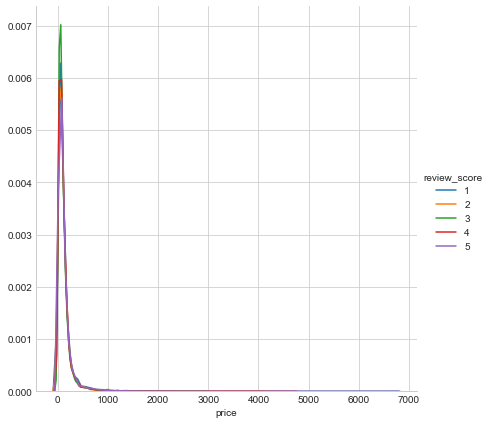

In [12]:

#https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

new_df_numeric

sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'price').add_legend()

In [5]:
new_df_numeric.price.skew()
new_df_numeric.price.kurtosis()

118.96125034725414

## Check QQ plot it fallow Gaussian Distribution or not 

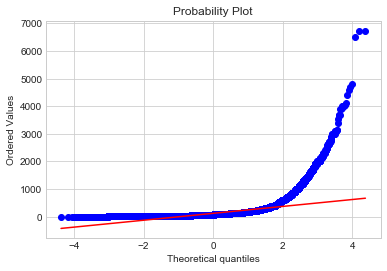

In [6]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(new_df_numeric.price, dist="norm", plot=pylab)
pylab.show()

<b>Observation</b>
1. Some point lies on the line not not follow gaussion distribution. 

In [13]:
new_df_numeric.columns

Index(['payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'price_new', 'freight_value_new', 'product_length_cm_new',
       'product_weight_g_new', 'payment_value_new', 'payment_installments_new',
       'Duration_delivered_Purchase_days', 'Delivered_Within_Estimated'],
      dtype='object')

## Transform into Gaussian Distribution using Box Cox

In [8]:
#https://medium.datadriveninvestor.com/how-to-transform-the-data-to-look-like-gaussian-distribution-c50ab3fdada5
# a, b = stats.boxcox(new_df_numeric.price)
# new_df_numeric['boxcox_col_price'] = a

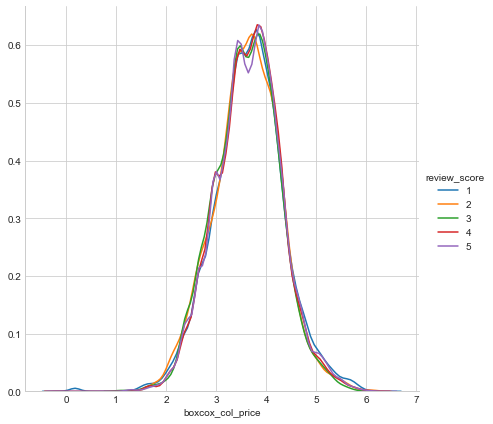

In [100]:
sns.set_style('whitegrid')
sns.FacetGrid(new_df_numeric,hue='review_score',size=6).map(sns.kdeplot,'boxcox_col_price').add_legend()

## Convert all the numerical feature into  look-like-gaussian-distribution

In [9]:
print(new_df_numeric.price)
print(new_df_numeric.freight_value)

0         124.99
1         112.99
2         112.99
3         124.99
4         106.99
           ...  
116576    389.00
116577     24.00
116578    139.00
116579    129.00
116580    129.00
Name: price, Length: 115597, dtype: float64
0         21.88
1         24.90
2         24.90
3         15.62
4         30.59
          ...  
116576    37.70
116577    10.81
116578    21.46
116579    26.18
116580    26.18
Name: freight_value, Length: 115597, dtype: float64


In [137]:

new_df_numeric_train = X_train.select_dtypes(include=np.number)
new_df_numeric_test = X_test.select_dtypes(include=np.number)

print(new_df_numeric_train.shape)
print(new_df_numeric_test.shape)

(80917, 20)
(34680, 20)


In [138]:
new_df_numeric_train = X_train.select_dtypes(include=np.number)
Col_val=list(X_train.select_dtypes(include='number').columns)
Col_val

['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'price_new',
 'freight_value_new',
 'product_length_cm_new',
 'product_weight_g_new',
 'payment_value_new',
 'payment_installments_new',
 'Duration_delivered_Purchase_days',
 'Delivered_Within_Estimated']

In [139]:
yeo_transform = PowerTransformer(method="yeo-johnson")
Col_val=list(X_train.select_dtypes(include='number').columns)
yeo_transform.fit(X_train[Col_val])
X_train_transform=yeo_transform.transform(X_train[Col_val])
X_test_transform=yeo_transform.transform(X_test[Col_val])


In [140]:
with open(r"yeo_johnson_transformation_updated.pickle", "wb") as output_file:
    cPickle.dump(yeo_transform,output_file)

In [141]:
with open(r"yeo_johnson_transformation_coloumn.pickle", "wb") as output_file:
    cPickle.dump(Col_val,output_file)

In [23]:
Col_val

['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'price_new',
 'freight_value_new',
 'product_length_cm_new',
 'product_weight_g_new',
 'payment_value_new',
 'payment_installments_new',
 'Duration_delivered_Purchase_days',
 'Delivered_Within_Estimated']

In [142]:
X_train.loc[:,Col_val]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated
77251,1,8,84.24,71.30,12.94,51.0,569.0,1.0,200.0,16.0,7.0,15.0,14260.0,2322.0830,336.0,200.000000,10277.28,8,6,15
29910,1,1,67.79,55.90,11.89,20.0,471.0,4.0,285.0,19.0,14.0,11.0,11180.0,2133.6605,399.0,285.000000,8270.38,35,9,17
59043,1,1,42.77,31.90,21.15,33.0,1084.0,2.0,200.0,41.0,2.0,29.0,6380.0,21.1500,41.0,200.000000,5217.94,35,27,6
18667,1,2,148.82,59.90,14.51,45.0,600.0,1.0,1325.0,24.0,24.0,20.0,11980.0,2603.8195,504.0,1325.000000,18156.04,70,7,8
5604,1,1,46.04,44.35,17.09,56.0,296.0,3.0,1400.0,25.0,7.0,15.0,8870.0,3066.8005,100.0,1400.000000,5616.88,35,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69673,1,1,122.17,109.90,12.27,33.0,932.0,1.0,396.0,18.0,11.0,14.0,21980.0,2201.8515,378.0,396.000000,14904.74,35,8,12
30094,1,1,77.03,59.90,17.13,41.0,799.0,1.0,700.0,26.0,13.0,27.0,11980.0,3073.9785,546.0,316.885469,9397.66,35,8,11
62219,1,2,155.07,139.00,16.07,57.0,207.0,1.0,400.0,28.0,6.0,13.0,139.0,2883.7615,588.0,400.000000,18918.54,70,3,6
97788,1,2,26.85,15.00,11.85,28.0,142.0,1.0,250.0,19.0,4.0,20.0,3000.0,2126.4825,399.0,250.000000,3275.70,70,9,10


In [143]:
X_test.loc[:,Col_val]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated
29537,1,1,47.68,39.90,7.78,32.0,84.0,2.0,515.0,39.0,11.0,25.0,7980.00,1396.1210,39.0,515.000000,5816.96,35,8,9
10701,1,1,40.28,23.49,16.79,45.0,334.0,3.0,100.0,38.0,2.0,22.0,4698.00,3012.9655,38.0,100.000000,4914.16,35,6,20
97695,1,4,215.06,180.00,16.32,49.0,1304.0,4.0,650.0,23.0,6.0,16.0,180.00,35.0600,483.0,650.000000,215.06,4,13,11
90353,1,4,217.01,201.99,15.02,54.0,292.0,2.0,3750.0,32.0,14.0,22.0,201.99,2695.3390,672.0,169.760072,217.01,4,1,12
64241,1,2,344.61,74.90,25.61,47.0,600.0,3.0,700.0,48.0,37.0,25.0,319.00,25.6100,48.0,263.693979,344.61,10,20,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54882,1,8,80.21,63.33,16.88,60.0,600.0,1.0,200.0,16.0,16.0,16.0,12666.00,3029.1160,336.0,200.000000,9785.62,8,12,12
62485,1,1,98.69,89.90,8.79,54.0,222.0,3.0,500.0,36.0,5.0,15.0,17980.00,1577.3655,756.0,500.000000,12040.18,35,3,4
12510,1,4,281.87,169.90,16.04,31.0,729.0,1.0,343.0,19.0,18.0,18.0,169.90,2878.3780,399.0,343.000000,281.87,4,5,14
63962,1,3,214.41,199.99,14.42,52.0,1340.0,1.0,800.0,26.0,17.0,17.0,199.99,2587.6690,546.0,800.000000,214.41,35,9,20


In [144]:
X_train_transform

array([[ 0.        ,  1.69925503, -0.27517128, ..., -1.28254065,
        -0.72033507,  0.48554926],
       [ 0.        , -0.93509532, -0.5553607 , ...,  0.32304191,
        -0.1241842 ,  0.76579669],
       [ 0.        , -0.93509532, -1.08361276, ...,  0.32304191,
         1.98465391, -0.7635997 ],
       ...,
       [ 0.        ,  0.3433481 ,  0.63399503, ...,  1.77839986,
        -1.54036647, -0.7635997 ],
       [ 0.        ,  0.3433481 , -1.53699457, ...,  1.77839986,
        -0.1241842 , -0.21130119],
       [ 0.        , -0.93509532,  0.45849635, ...,  0.32304191,
        -2.388586  , -0.21130119]])

In [146]:
X_test_transform

array([[ 0.        , -0.93509532, -0.96654816, ...,  0.32304191,
        -0.306715  , -0.34988859],
       [ 0.        , -0.93509532, -1.14632752, ...,  0.32304191,
        -0.72033507,  1.18748621],
       [ 0.        ,  1.21727334,  1.20543459, ..., -1.64328318,
         0.49732953, -0.07242472],
       ...,
       [ 0.        ,  1.21727334,  1.72877997, ..., -1.64328318,
        -0.95958954,  0.34572024],
       [ 0.        ,  0.90789402,  1.19984755, ...,  0.32304191,
        -0.1241842 ,  1.18748621],
       [ 0.        ,  0.3433481 , -0.64500792, ...,  1.77839986,
        -1.54036647, -0.7635997 ]])

In [148]:
X_train.loc[:,Col_val]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated
77251,0.0,1.699255,-0.275171,0.041258,-0.583947,0.055182,-0.001002,-0.893488,-1.142493,-1.330832,-0.847705,-0.696569,0.748776,0.516723,-0.005449,-0.694485,0.599723,-1.282541,-0.720335,0.485549
29910,0.0,-0.935095,-0.555361,-0.291129,-0.805278,-2.051642,-0.283734,1.417617,-0.774303,-0.755691,0.192028,-1.607231,0.487345,0.415666,0.267856,-0.254917,0.378270,0.323042,-0.124184,0.765797
59043,0.0,-0.935095,-1.083613,-0.988433,0.965273,-1.537786,1.087885,0.560191,-1.142493,1.137296,-2.047798,0.909773,-0.025480,-1.560017,-1.554131,-0.694485,-0.033258,0.323042,1.984654,-0.763600
18667,0.0,0.343348,0.566533,-0.198631,-0.264746,-0.610877,0.081163,-0.893488,0.929615,-0.072041,1.239624,0.057319,0.558992,0.661057,0.702406,1.724747,1.277588,1.778400,-0.504303,-0.488159
5604,0.0,-0.935095,-1.004742,-0.590179,0.233719,0.727786,-0.916190,1.130687,0.993963,0.036729,-0.847705,-0.696569,0.261526,0.883491,-1.177346,1.797853,0.027683,0.323042,0.355212,-0.488159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69673,0.0,-0.935095,0.255848,0.680421,-0.724395,-1.537786,0.814173,-0.893488,-0.424240,-0.929695,-0.205697,-0.890207,1.282444,0.452694,0.177940,0.158970,1.025243,0.323042,-0.306715,0.066717
30094,0.0,-0.935095,-0.393126,-0.198631,0.241221,-0.976183,0.547237,-0.893488,0.200756,0.138413,0.065448,0.755917,0.558992,0.886813,0.870197,-0.122063,0.506231,0.323042,-0.306715,-0.072425
62219,0.0,0.343348,0.633995,1.054782,0.040188,0.875931,-1.348254,-0.893488,-0.413420,0.323232,-1.038450,-1.103863,-1.606055,0.797530,1.035037,0.171702,1.332701,1.778400,-1.540366,-0.763600
97788,0.0,0.343348,-1.536995,-1.786545,-0.813845,-1.787459,-1.757392,-0.893488,-0.911570,-0.755691,-1.478402,0.057319,-0.554589,0.411737,0.267856,-0.418279,-0.380224,1.778400,-0.124184,-0.211301


In [149]:
X_test.loc[:,Col_val]

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,product_weight_g_new,payment_value_new,payment_installments_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated
29537,0.0,-0.935095,-0.966548,-0.721430,-1.749643,-1.593521,-2.256981,0.560191,-0.138937,1.042550,-0.205697,0.584956,0.165214,-0.026607,-1.568529,0.493463,0.057258,0.323042,-0.306715,-0.349889
10701,0.0,-0.935095,-1.146328,-1.330678,0.177249,-0.610877,-0.759837,1.130687,-1.836935,0.992000,-2.047798,0.288607,-0.259761,0.858459,-1.575791,-1.535924,-0.081591,0.323042,-0.720335,1.187486
97695,0.0,1.217273,1.205435,1.490367,0.088029,-0.183310,1.439279,1.417617,0.118093,-0.188705,-1.038450,-0.519988,-1.559264,-1.505041,0.617311,0.792689,-1.516975,-1.643283,0.497330,-0.072425
90353,0.0,1.217273,1.222129,1.692924,-0.163796,0.445319,-0.933461,0.560191,2.185824,0.633259,0.192028,0.288607,-1.536750,0.706382,1.356857,-0.895773,-1.514867,-1.643283,-2.388586,0.066717
64241,0.0,0.343348,2.149983,0.110859,1.710936,-0.405149,0.081163,1.130687,0.200756,1.414829,2.263092,0.584956,-1.436287,-1.541004,-1.504922,-0.351896,-1.396179,-1.126158,1.331066,-0.626077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54882,0.0,1.699255,-0.340249,-0.123013,0.194229,1.348795,0.081163,-0.893488,-1.142493,-1.330832,0.430280,-0.519988,0.618196,0.865990,-0.005449,-0.694485,0.548095,-1.282541,0.355212,0.066717
62485,0.0,-0.935095,-0.057314,0.375791,-1.503952,0.445319,-1.267236,1.130687,-0.171286,0.883765,-1.246979,-0.696569,1.023014,0.090440,1.669511,0.455662,0.773392,0.323042,-1.540366,-1.037220
12510,0.0,1.217273,1.728780,1.390841,0.034429,-1.646283,0.393829,-0.893488,-0.578123,-0.755691,0.651692,-0.208918,-1.570151,0.794964,0.267856,-0.022492,-1.450420,-1.643283,-0.959590,0.345720
63962,0.0,0.907894,1.199848,1.675229,-0.282694,0.180841,1.492671,-0.893488,0.350737,0.138413,0.542897,-0.358084,-1.538735,0.652983,0.870197,1.061833,-1.517680,0.323042,-0.124184,1.187486


In [41]:
X_train_transform[:,1]
X_train[Col_val[0]]

77251    1
29910    1
59043    1
18667    1
5604     1
        ..
69673    1
30094    1
62219    1
97788    1
20389    1
Name: payment_sequential, Length: 80917, dtype: int64

In [147]:
for i in range(len(Col_val)): 
    X_train[Col_val[i]]=X_train_transform[:,i]
    X_test[Col_val[i]]=X_test_transform[:,i]
    print(Col_val[i])

payment_sequential
payment_installments
payment_value
price
freight_value
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
price_new
freight_value_new
product_length_cm_new
product_weight_g_new
payment_value_new
payment_installments_new
Duration_delivered_Purchase_days
Delivered_Within_Estimated


In [150]:
with open(r"X_Train_updated_new.pickle", "wb") as output_file1:
    cPickle.dump(X_train,output_file1)
    
with open(r"X_TEST_updated_new.pickle", "wb") as output_file2:
    cPickle.dump(X_test,output_file2)
    
with open(r"Y_Train_updated_new.pickle", "wb") as output_file3:
    cPickle.dump(y_train,output_file3) 
    
with open(r"Y_Test_updated_new.pickle", "wb") as output_file4:
    cPickle.dump(y_test,output_file4) 

In [155]:
print('Train Shape is',X_train.shape,y_train.shape)
print('Test Shape is',X_test.shape,y_test.shape)

Train Shape is (80917, 28) (80917,)
Test Shape is (34680, 28) (34680,)


In [159]:
X_test.payment_sequential.unique()

array([0.])

In [49]:
# #a, b = stats.boxcox(new_df_numeric.price)
# Col_list=list(new_df_numeric.columns[new_df_numeric.columns!='review_score'])
# for i in Col_list:
#     print(i)
    
#     yeo_transform = PowerTransformer(method="yeo-johnson")
#     new_df_numeric[i]=yeo_transform.fit_transform(new_df_numeric[i].values.reshape(-1, 1))
    

<b>Observation</b>
1. after box cox transformation it nearly follow the distribution  

In [53]:
# print('Skewness is',new_df_numeric.payment_sequential.skew())
# print('kurtosis is',new_df_numeric.payment_sequential.kurtosis())

In [54]:
# new_df_numeric.columns

In [52]:
# columns=list(new_df_numeric.columns)

# # columns.remove('Delivered_Within_Estimated')
# # columns.remove('Duration_delivered_Purchase_days')
# columns.remove('zip_code_prefix_seller')
# columns.remove('review_score')
# columns

In [50]:
# for i in columns:
#     sns.set_style("whitegrid")
#     sns.FacetGrid(new_df_numeric,hue="review_score",size=5.5).map(sns.kdeplot,i).add_legend();
    
#     plt.title("Distribution Plot of {0}".format(i),size=15,y=1.05)
#     plt.xlabel(i,size=15)
#     plt.show()
#     print('\n')

In [51]:
# print('Skewness is',new_df_numeric.product_length_cm.skew())
# print('kurtosis is',new_df_numeric.product_length_cm.kurtosis())